In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [31]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=100,shuffle=True)

In [32]:
torch.set_grad_enabled(True)
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        # t = F.softmax(t, dim=1)

        return t

    def __repr__(self):
        return "Bunny Kitten"

In [33]:
network = Network()

In [34]:
batch = next(iter(train_loader))
images, labels = batch

tensor([5, 2, 3, 1, 5, 7, 9, 1, 9, 2, 2, 0, 8, 0, 1, 1, 9, 5, 7, 7, 8, 0, 0, 0,
        9, 4, 5, 2, 7, 1, 1, 8, 8, 5, 4, 4, 4, 7, 4, 1, 2, 2, 5, 6, 1, 5, 7, 2,
        6, 5, 8, 5, 9, 9, 9, 1, 9, 7, 1, 6, 6, 5, 2, 3, 4, 4, 8, 5, 6, 9, 5, 5,
        6, 0, 4, 1, 3, 2, 0, 8, 8, 5, 6, 9, 5, 9, 1, 1, 6, 3, 0, 3, 0, 6, 8, 7,
        2, 6, 3, 9])


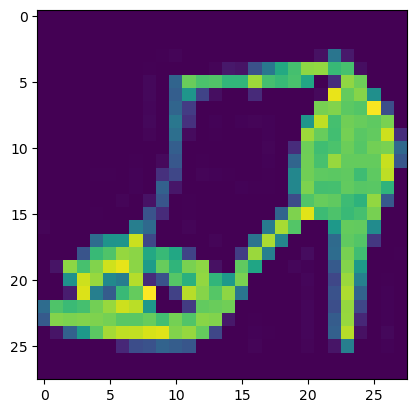

In [35]:
plt.imshow(images[0,0,:,:])
print(labels)

In [36]:


preds = network(images)

print(preds.argmax(dim=1))
print(labels)
print(preds.argmax(dim=1).eq(labels))
print(preds.argmax(dim=1).eq(labels).sum())

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6])
tensor([5, 2, 3, 1, 5, 7, 9, 1, 9, 2, 2, 0, 8, 0, 1, 1, 9, 5, 7, 7, 8, 0, 0, 0,
        9, 4, 5, 2, 7, 1, 1, 8, 8, 5, 4, 4, 4, 7, 4, 1, 2, 2, 5, 6, 1, 5, 7, 2,
        6, 5, 8, 5, 9, 9, 9, 1, 9, 7, 1, 6, 6, 5, 2, 3, 4, 4, 8, 5, 6, 9, 5, 5,
        6, 0, 4, 1, 3, 2, 0, 8, 8, 5, 6, 9, 5, 9, 1, 1, 6, 3, 0, 3, 0, 6, 8, 7,
        2, 6, 3, 9])
tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
      

In [30]:
print(preds[0])
print(labels[0])

tensor([0.0982, 0.1001, 0.1074, 0.1055, 0.0980, 0.0921, 0.0933, 0.0931, 0.1098,
        0.1026], grad_fn=<SelectBackward0>)
tensor(7)
